In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import time

In [3]:
X_dev = pd.read_csv('finalized_data/X_dev.csv')
X_test = pd.read_csv('finalized_data/X_test.csv')
y_dev = pd.read_csv('finalized_data/y_dev.csv')
y_test = pd.read_csv('finalized_data/y_test.csv')

## Initial Tree (w/o Tuning)

__Tree Fitting__

In [22]:
## Decision Tree Fitting
tree_regressor = DecisionTreeRegressor(random_state=41)
start = time.time()
tree_regressor.fit(X_dev, y_dev)

## Prediction
tree_regressor_dev_pred = tree_regressor.predict(X_dev)
tree_regressor_pred = tree_regressor.predict(X_test)

## Initial R2 Score
tree_regressor_dev_r2 = r2_score(y_dev, tree_regressor_dev_pred)
tree_regressor_r2 = r2_score(y_test, tree_regressor_pred)
end = time.time()
tt = (end-start)
print(f"Dev Score: {tree_regressor_dev_r2}")
print(f"Test Score: {tree_regressor_r2}")
print(f'Time taken: {tt} seconds')

Dev Score: 1.0
Test Score: -0.6242850039214853
Time taken: 5.4250078201293945 seconds


__Tree Depth Visualization__

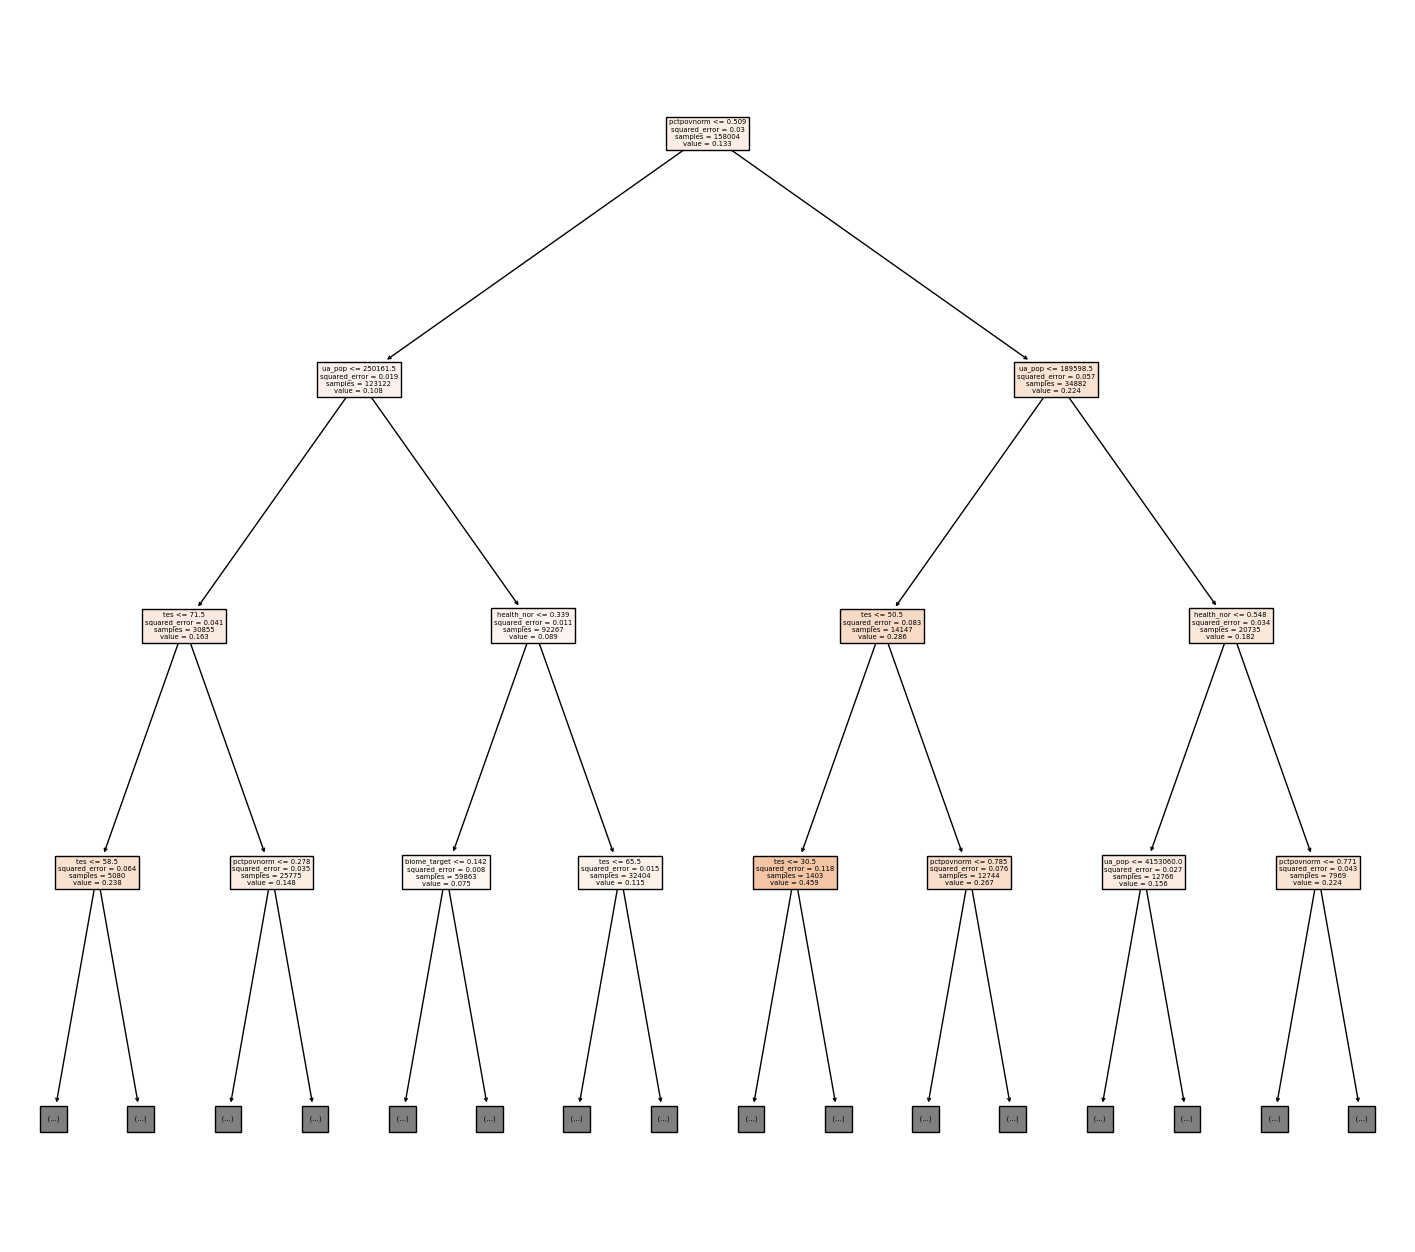

In [5]:
## Visualize Tree to depth 3
plt.figure(figsize=(18,16))
plot_tree(tree_regressor, filled=True, feature_names = list(X_dev.columns), max_depth=3)
plt.show()

__Feature Importance__

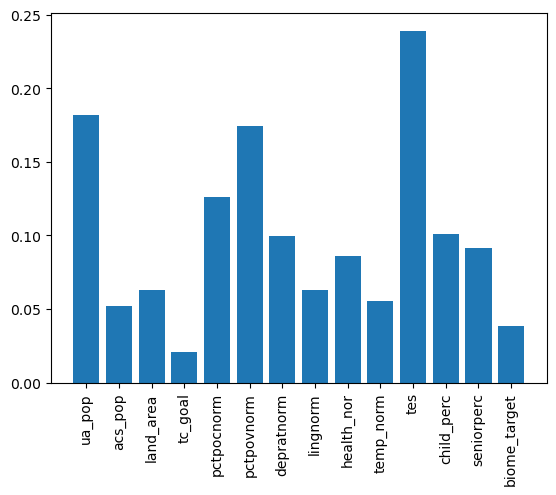

In [6]:
perm = permutation_importance(tree_regressor, X_test, y_test)
mean_perm = perm.importances_mean
plt.bar(X_dev.columns, mean_perm)
plt.xticks(rotation=90)
plt.show()

## CV ##

__Grid Search__

In [12]:
grid = {'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 8], 'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), grid, scoring='r2', cv=5)
grid_search.fit(X_dev, y_dev)
best_params_grid = grid_search.best_params_
best_tree_grid = grid_search.best_estimator_
best_score_grid = grid_search.best_score_

print(f'Best parameters: {best_params_grid}')
print(f'Best score: {best_score_grid}')

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Best score: 0.17320545156985093


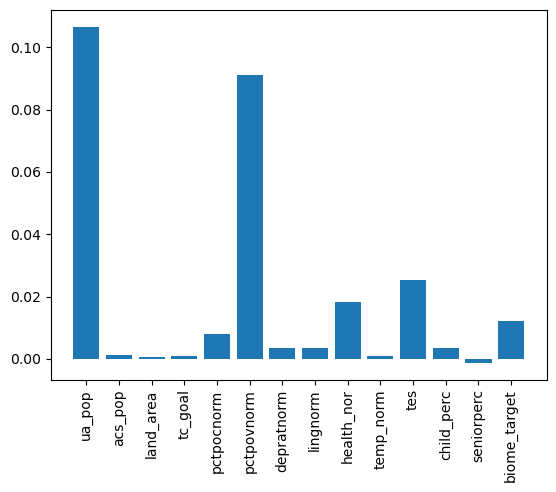

In [16]:
perm_grid = permutation_importance(best_tree_grid, X_test, y_test)
mean_perm_grid = perm_grid.importances_mean
plt.bar(X_dev.columns, mean_perm_grid)
plt.xticks(rotation=90)
plt.show()

__Random Search__

In [10]:
from scipy.stats import randint

random_grid={'max_depth': randint(1, 20), 
               'max_features':['sqrt', 'log2'], 
               'min_samples_leaf': randint(1,12)}
random_search = RandomizedSearchCV(DecisionTreeRegressor(), random_grid, scoring='r2', cv=5)
random_search.fit(X_dev, y_dev)
best_params_rand = random_search.best_params_
best_tree_rand = random_search.best_estimator_
best_score_rand = random_search.best_score_

print(f'Best parameters: {best_params_rand}')
print(f'Best score: {best_score_rand}')

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2}
Best score: 0.16232610550602528


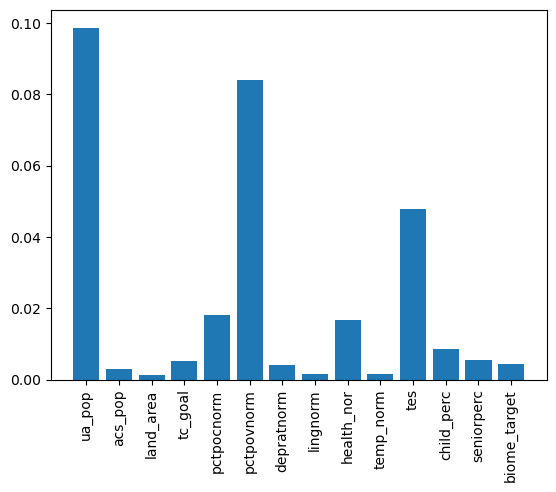

In [15]:
perm_rand = permutation_importance(best_tree_rand, X_test, y_test)
mean_perm_rand = perm_rand.importances_mean
plt.bar(X_dev.columns, mean_perm_rand)
plt.xticks(rotation=90)
plt.show()

In [23]:
## Train on top 3 features
top_feats = ['ua_pop', 'pctpovnorm', 'tes']
X_dev_top_feats = X_dev[top_feats]
X_test_top_feats = X_test[top_feats]

## Train using best grid params
feat_tree = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4, random_state=42)
start = time.time()
feat_tree.fit(X_dev_top_feats, y_dev)
feat_predictions = feat_tree.predict(X_test_top_feats)

r2_feats = r2_score(y_test, feat_predictions)
end = time.time()
tt = end-start
print(f'r2 score: {r2_feats}')
print(f'Time taken: {tt} seconds')

r2 score: 0.1671678125117808
Time taken: 0.19865703582763672 seconds
